In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pcl
import rosbag
import rospy
import tf2_ros as tf

from cv_bridge import CvBridge, CvBridgeError
from open3d import *
from geometry_msgs.msg import TransformStamped
#from sensor_msgs import point_cloud2 as pc2
from sensor_msgs.msg import Image, PointCloud, PointCloud2
from __future__ import print_function

/usr/lib/python2.7/dist-packages/rosdep2/platforms/pip.py:32: UserWarning: Module pcl was already imported from /usr/local/lib/python2.7/dist-packages/python_pcl-0.3-py2.7-linux-x86_64.egg/pcl/__init__.pyc, but /home/neil/fetch/svm is being added to sys.path
  import pkg_resources


### pcd analysis
Voxellize down to $0.5 cm^3$

In [2]:
import ipyvolume as ipv
import pcl_helper

In [3]:
def view(A):
    if type(A)!='numpy.ndarray':
        A = np.asarray(A).T
    return ipv.quickscatter(A[0,], A[1,], A[2,], size=1, marker='point_2d')

In [4]:
def transform(A, rads=0, axis='z'):
    if type(A)!='numpy.ndarray':
        A = np.asarray(A)
    R = np.array([[1, 0, 0], [0, np.cos(rads), -np.sin(rads)], [0, np.sin(rads), np.cos(rads)]])
    return np.matmul(A, R)

In [35]:
#X = pcl.load('../data/pcd_bolts_in_bin/' + targets[0])
bag = rosbag.Bag('../data/new_bin_with_screws.bag', "r")
bridge = CvBridge()
topics=['/head_camera/rgb/image_raw', '/head_camera/depth_registered/points']

In [36]:
for topic, msg, _ in bag.read_messages(topics=topics):
    if topic==topics[0]:
        img = bridge.imgmsg_to_cv2(msg, desired_encoding="passthrough")
    else:
        pts = pcl_helper.XYZRGB_to_XYZ(pcl_helper.ros_to_pcl(msg))

In [43]:
view(pts)

VkJveChjaGlsZHJlbj0oRmlndXJlKGNhbWVyYT1QZXJzcGVjdGl2ZUNhbWVyYShmb3Y9NDYuMCwgcG9zaXRpb249KDAuMCwgMC4wLCAyLjApLCBxdWF0ZXJuaW9uPSgwLjAsIDAuMCwgMC4wLCDigKY=


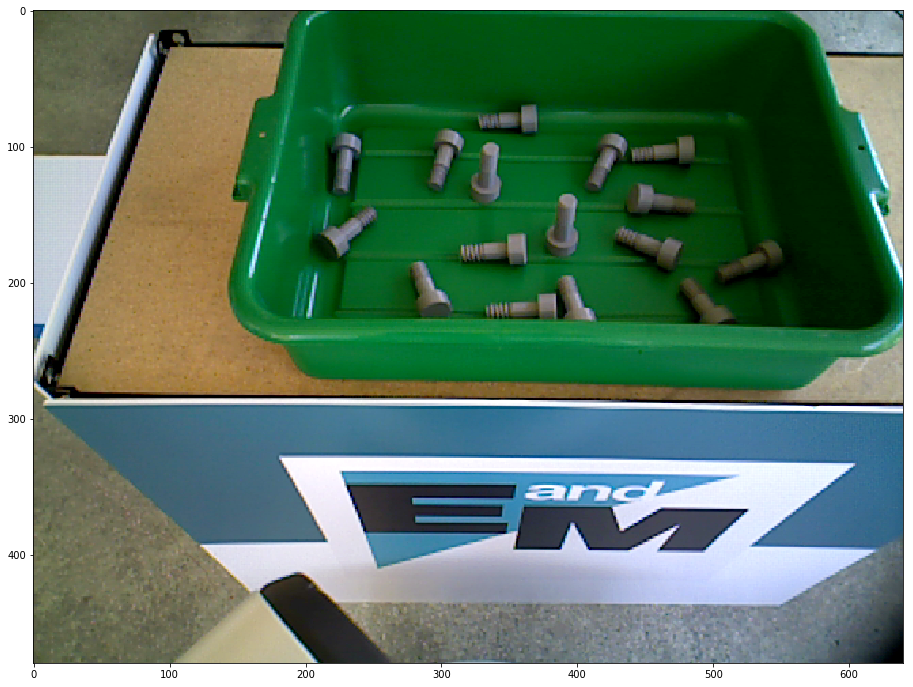

In [38]:
_, _ = plt.subplots(figsize=(640/40, 480/40))
plt.imshow(img)

In [79]:
outlier_filter = cloud_objects.make_statistical_outlier_filter()
outlier_filter.set_mean_k(5)
outlier_filter.set_std_dev_mul_thresh(0.00001)
cloud_filtered = outlier_filter.filter()

In [80]:
view(cloud_filtered)

VkJveChjaGlsZHJlbj0oRmlndXJlKGNhbWVyYT1QZXJzcGVjdGl2ZUNhbWVyYShmb3Y9NDYuMCwgcG9zaXRpb249KDAuMCwgMC4wLCAyLjApLCBxdWF0ZXJuaW9uPSgwLjAsIDAuMCwgMC4wLCDigKY=


In [39]:
seg = pts.make_segmenter()
seg.set_model_type(pcl.SACMODEL_PLANE)
seg.set_method_type(pcl.SAC_RANSAC)

In [59]:
max_distance = 0.05
seg.set_distance_threshold(max_distance)

In [60]:
inliers, coefficients = seg.segment()

In [61]:
cloud_objects = pts.extract(inliers, negative=False)

In [62]:
view(cloud_objects)

VkJveChjaGlsZHJlbj0oRmlndXJlKGNhbWVyYT1QZXJzcGVjdGl2ZUNhbWVyYShmb3Y9NDYuMCwgcG9zaXRpb249KDAuMCwgMC4wLCAyLjApLCBxdWF0ZXJuaW9uPSgwLjAsIDAuMCwgMC4wLCDigKY=


In [71]:
tree = pts.make_kdtree()
ec = pts.make_EuclideanClusterExtraction()
ec.set_ClusterTolerance(0.01)
ec.set_MinClusterSize(10)
ec.set_MaxClusterSize(2500)
ec.set_SearchMethod(tree)
cluster_indices = ec.Extract()

In [73]:
len(cluster_indices)

91

### transform to base frame

In [14]:
import tf

`bag` takes a long time to load, avoid rerunning this.
(pickle?)

In [9]:
bag = rosbag.Bag('../data/new_bin_with_screws.bag')
bag.get_message_count()

477

In [20]:
points = []
for (_, msg, t) in bag.read_messages(topics=['/head_camera/depth_registered/points']):
    points.append(msg)

In [21]:
rospy.init_node('svm')
listener = tf.TransformListener()
while not rospy.Time.now():
    pass

In [23]:
(trans, rot) = listener.lookupTransform('head_camera_depth_frame', 'base_link', rospy.Time(0))

In [24]:
listener.transformPointCloud(point_cloud=points[0], target_frame='base_link')

AttributeError: '_sensor_msgs__PointCloud2' object has no attribute 'channels'

In [28]:
N = np.asarray(X)
N.shape

(307200, 3)

In [30]:
m = TransformStamped()
m.header.frame_id = "head_camera_optical_frame"
br.setTransform(m)

AttributeError: TransformBroadcaster instance has no attribute 'setTransform'

In [ ]:
X = X.make_passthrough_filter()
X.set_filter_field_name('z')